# Firmware validation

Using the pattern files from the CMSSW emulator and the FPGA simulation we can validate our integration.

Reference files are provided in `solutions/part3/`
- `sink.txt` from the firmware simulation
- `L1TMLDemoPatterns_out_0.txt` from the CMSSW emulator

We read from the pattern file data to numpy arrays, scaling to the physical range of the data type. Then we plot the distribution and compute the difference between the two.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import mplhep

In [2]:
def read_pattern_file_to_numpy(f):
    '''
    A quick and dirty pattern file reader for our data format
    '''
    fp = open(f)
    lines = fp.readlines()
    X = []
    for line in lines:
        if 'Frame' in line:
            fields = line.split()
            v = '1' in fields[2]
            if v:
                x = int(fields[3], 16)
                x = x / 2**11
                X.append(x)
    return np.array(X, dtype='float')

In [3]:
y_cmssw = read_pattern_file_to_numpy(os.environ['MLATL1T_DIR'] + '/solutions/part3/L1TMLDemoPatterns_out_0.txt')
y_fpga = read_pattern_file_to_numpy(os.environ['MLATL1T_DIR'] + '/solutions/part3/sink.txt')

/afs/cern.ch/user/s/ssummers/.local/lib/python3.9/site-packages/numpy/core/getlimits.py:500: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/afs/cern.ch/user/s/ssummers/.local/lib/python3.9/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  return self._float_to_str(self.smallest_subnormal)


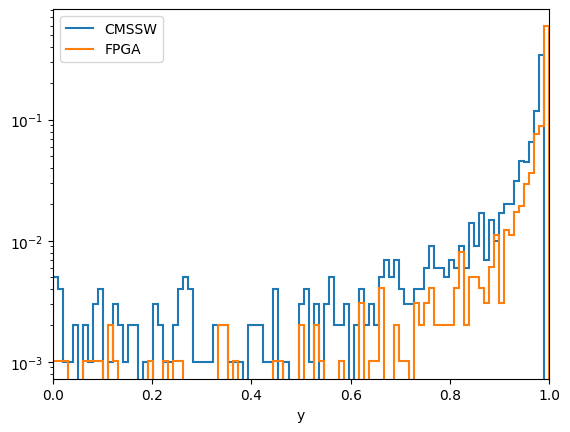

In [4]:
bins = np.linspace(0, 1, 100)
h_cmssw, _ = np.histogram(y_cmssw, bins=bins)
h_cmssw = h_cmssw.astype('float') / np.sum(h_cmssw)
h_fpga, _ = np.histogram(y_fpga, bins=bins)
h_fpga = h_fpga.astype('float') / np.sum(h_fpga)
mplhep.histplot(h_cmssw, bins, label='CMSSW')
mplhep.histplot(h_fpga, bins, label='FPGA')
plt.xlim((0, 1))
plt.xlabel('y')
plt.semilogy()
plt.legend(loc='upper left')

Text(0.5, 0, 'y_cmssw - y_fpga')

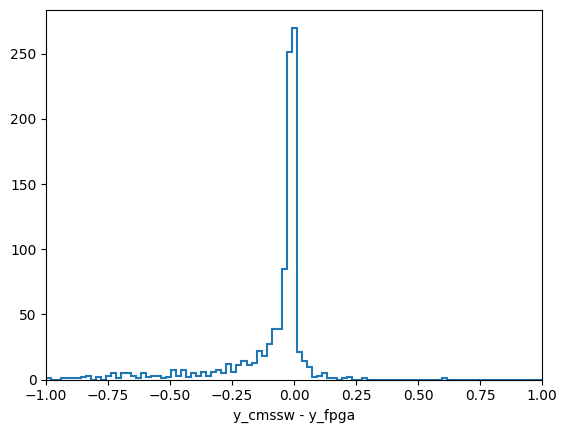

In [5]:
N = min([len(y_fpga), len(y_cmssw)])
d = y_cmssw[:N] - y_fpga[:N]
bins = np.linspace(-1,1,100)
h, _ = np.histogram(d, bins=bins)
mplhep.histplot(h, bins)
plt.xlim((-1,1))
plt.xlabel('y_cmssw - y_fpga')